In [3]:
"""
1. XGBoost Hyper Parameter
2. Best Parameter
"""
#from xgboost import XGBClassifier # 분류 트리를 만듬
from xgboost import XGBRegressor # 회귀트리를 만들어줌
from xgboost import plot_importance # 중요변수 시각화 해줌
#from sklearn.datasets import make_blobs # 범주가 3개 클러스트 데이터셋
from sklearn.datasets import load_boston # y가 연속형인 (숫자형)
from sklearn.metrics import accuracy_score,classification_report # y가 범주형일떄 사용할수 있느 평가 방버들
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split # dataset split
import matplotlib.pyplot as plt

# 1. data load
boston = load_boston()
#print(boston)
boston_x = boston.data
boston_y = boston.target
print(boston_x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
# 2. dataset split(훈련 검정 나눔)
X_tarin,X_test,y_train,y_test = train_test_split(boston_x,boston_y,test_size=0.3)

In [10]:
# 3. model 생성
#obj=XGBRegressor() # default 값으로 해
#print(obj) # 파라미터 확인
obj=XGBRegressor(colsample_bylevel=1,
                 learning_rate=0.1,
                 max_depth=3,
                 min_child_weight=1,
                 n_estimators=400)
"""
모델을 튜닝할때 다루는 대표적 파라미터
colsample_bylevel=None : tree 생성시 훈련셋에서 x 변수 샘플링 비율(0.6~0.9 비율로 많이 생성한다)
learning_rate=None :  학습률 (0.01~0.2을 주로 많이씀 크면클수록 ??)
max_depth=None :  tree깊이 (지나치게 길게하면 과적합에 영향을 미친 과적합될확률이 높아지다느 뜻)
min_child_weight : 최소 자식노드 가중치 합(하나의 노드에 갈라지는 노드가 자식 노드 어느정도의 자식노드를 만들것이냐 가중치가 1이다 그럼 자식노드가 0.5이면 더이상 자식노드를 안만듬 ???)
n_estimators=100 : tree model수 몇개의ㅣ 트리를 가지고 해줄것이냐 (기본값은 100)
objective='reg:squarederrr' :(기본값) y에대한 범주에 따라 달라짐( 회귀 트리를 만들겠다는 뜻) binary:logistic:분류 트리(이항) binary:logistic: 분류트리 (다항 분류)
"""
# 4. model학습 : 400번까지 않고 100번까지학습하는 조기종료를 할수있다 더이상 학습할이유가 없다면(조기종료 파라미터)
evals=[(X_test,y_test)] 
model=obj.fit(X_tarin,y_train,eval_metric="rmse",
              early_stopping_rounds=100,
              eval_set =evals,verbose=True)

[0]	validation_0-rmse:21.93031
[1]	validation_0-rmse:19.89243
[2]	validation_0-rmse:18.04725
[3]	validation_0-rmse:16.40797
[4]	validation_0-rmse:14.89517
[5]	validation_0-rmse:13.58142
[6]	validation_0-rmse:12.35568
[7]	validation_0-rmse:11.25149
[8]	validation_0-rmse:10.27621
[9]	validation_0-rmse:9.41678
[10]	validation_0-rmse:8.65539
[11]	validation_0-rmse:7.98227
[12]	validation_0-rmse:7.39414
[13]	validation_0-rmse:6.88000
[14]	validation_0-rmse:6.37529
[15]	validation_0-rmse:5.95303
[16]	validation_0-rmse:5.60356
[17]	validation_0-rmse:5.26403
[18]	validation_0-rmse:4.98090
[19]	validation_0-rmse:4.72784
[20]	validation_0-rmse:4.52818
[21]	validation_0-rmse:4.32238
[22]	validation_0-rmse:4.15502
[23]	validation_0-rmse:4.01756
[24]	validation_0-rmse:3.87866
[25]	validation_0-rmse:3.78541
[26]	validation_0-rmse:3.71450
[27]	validation_0-rmse:3.62707
[28]	validation_0-rmse:3.55538
[29]	validation_0-rmse:3.48115
[30]	validation_0-rmse:3.42954
[31]	validation_0-rmse:3.37953
[32]	vali

[260]	validation_0-rmse:2.74949
[261]	validation_0-rmse:2.74954
[262]	validation_0-rmse:2.74983
[263]	validation_0-rmse:2.75137
[264]	validation_0-rmse:2.75061
[265]	validation_0-rmse:2.74999
[266]	validation_0-rmse:2.74829
[267]	validation_0-rmse:2.74860
[268]	validation_0-rmse:2.74974
[269]	validation_0-rmse:2.74946
[270]	validation_0-rmse:2.74788
[271]	validation_0-rmse:2.74872
[272]	validation_0-rmse:2.74882
[273]	validation_0-rmse:2.74879
[274]	validation_0-rmse:2.74815
[275]	validation_0-rmse:2.74817
[276]	validation_0-rmse:2.74890
[277]	validation_0-rmse:2.74923
[278]	validation_0-rmse:2.74882
[279]	validation_0-rmse:2.74779
[280]	validation_0-rmse:2.74821
[281]	validation_0-rmse:2.74722
[282]	validation_0-rmse:2.74698
[283]	validation_0-rmse:2.74786
[284]	validation_0-rmse:2.74626
[285]	validation_0-rmse:2.74677
[286]	validation_0-rmse:2.74585
[287]	validation_0-rmse:2.74586
[288]	validation_0-rmse:2.74515
[289]	validation_0-rmse:2.74436
[290]	validation_0-rmse:2.74504
[291]	va

{'f12': 292, 'f5': 362, 'f7': 349, 'f4': 177, 'f0': 503, 'f2': 92, 'f11': 212, 'f6': 322, 'f10': 76, 'f9': 100, 'f8': 55, 'f3': 12, 'f1': 42}
13


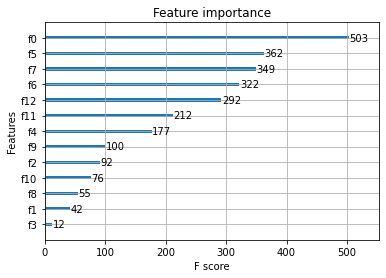

In [11]:
# 5. 중요변수 확인 
fscore = model.get_booster().get_fscore()
print(fscore) # {'f0': 3345, 'f5': 4024, 'f6': 3507, 'f11': 3568,
print(len(fscore)) # 13

plot_importance(fscore)
plt.show()

In [16]:
# 5. 예측치/report
pred = model.predict(X_test)


MSE = mean_squared_error(y_test,pred)
print('MSE = ', MSE)
# MSE =  34.78434210526316

score = r2_score(y_test,pred)
print('r2_score =', score)
# r2_score = 0.8849065017081268

print(pred.mean())
print(y_test.mean())

MSE =  7.462582070332686
r2_score = 0.9138512840388984
22.823433
22.863815789473687


In [22]:
############################3
####Grid Search model
##############################

from sklearn.model_selection import GridSearchCV


# 파라미터 설정
parmas={"max_depth":[3,5,7],
        "min_child_weight":[1,3],
        "colsample_bylevel":[0.5,0.7],
        "learning_rate":[0.01,0.5,0.1]}

# GridSearchCV
gs= GridSearchCV(estimator=model,param_grid=parmas,cv=5) # iid ???

gs_model = gs.fit(X=X_tarin,y=y_train)


print("best score : ",gs_model.best_score_)
print("best parameter : ",gs_model.best_params_)

best score :  0.8840824729637774
best parameter :  {'colsample_bylevel': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1}


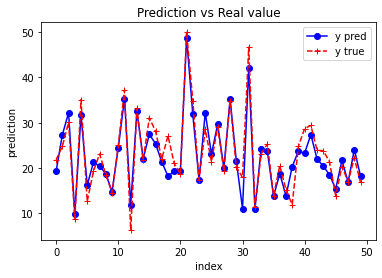

In [18]:
# 6. prediction vs real value
fig = plt.figure()
chart = fig.add_subplot(1,1,1)
chart.plot(pred[:50], marker='o', color='blue', linestyle='-', label='y pred')
chart.plot(y_test[:50], marker='+', color='red', linestyle='--', label='y true')

chart.set_title('Prediction vs Real value')
plt.xlabel('index')
plt.ylabel('prediction')
plt.legend(loc='best')
plt.show()